This week we continue our discussion of supervised learning models. Last week, we became familiar with the types of machine learning and talked about generic train/test split and types of evaluation metrics for regression and classification problems, as well as how to choose them.

This week, we will talk a bit more about the algorithms themselves. 
- What is the bias-variance tradoff?
- How does a decision tree work?
- A linear/logistic regression?
- Ensemble models: random forest and gradient bosoting models 

**Note: As a data scientist, it is more important for you to learn the basics of machine learning algorithms. Understand how a linear and logistic regressions work, that are they optimizing, what is a decision tree, how it works, what are the advantages and disadvantages.** 

For a good first theoretical foundation or a reference, I recommend a great book (free pdf): 'Intoduction to Statistical Learning' (https://www.ime.unicamp.br/~dias/Intoduction%20to%20Statistical%20Learning.pdf)

### Theory simplified intro

In machine learning, we want to estimate (approximate) an output Y as a function of the input X and some error term. 

        Y = f(X) + e
        
        where f() is an unknown function and e is a random error term. 
        
Since we do not know the real function f(), we build different estimates of it, $\hat{f}$ for which we get different prediction vector of the target, $\hat{Y}$.

**The bias-variance trade-off**

Our aim is to minimize the error of the model (or find the minimum of the cost, also known as lost function). The model error can be split into:
- Error due to bias
- Error due to variance
- Irreducible error (due to the error term)

**Bias**: simplifying assumption made by a model to make the problem easier to learn (for example, assuming linearity)
- ***Low bias***: It means the model makes many assumptions about the functional form (takes too many degrees of freedom), i.e. the error will be low on the training data but high on the testing data and we may likely ***overfit***
- ***High bias***: It means the model makes fewer assumptions and less of a difference between training and testing errors but maybe the functional form is too simplistic for the use case (higher chances of ****underfitting****)

**Q1.** Can you give examples of algorithms with low bias? How about algorithms with relatively high bias? 

**Answer:** Models with high bias could be linear and logistic regressions. And low bias could be any of the more complex models (random forests, any type of an ensemble model, gradient boosting, support vector machines. But even single decision trees can have low bias since they can me made very complex and thus, can overfit.

**Variance**: Refer to the amount the estimated function will change if we estimate it with another data. Models with high variances are very influenced by the data at hand and may not be very robust in the long run. 
- ***Low Variance***: Suggests small changes to the estimate of the target function with changes to the training dataset.
- ***High Variance***: Suggests large changes to the estimate of the target function with changes to the training dataset.

**Q2.** Which models do have - in general - low variance? Which have high? 

**Answer:** Example of low-variance algorithms are logistic and linear regression. Due to their linear nature, changes in the data will not result in big changes in the target estimate. But they also have high bias.

At the same time, the more complex algorithms mentioned above (those with low bias) will tend to have high variance. 




      The bias-variance trade-off then refers to the fact that decreasing one will result in increasing the other. While a good-performing and robust algorithm will ideally have both how variance and low bias, one comes at the cost of the other.

### Decision trees

How does a decision tree work? 

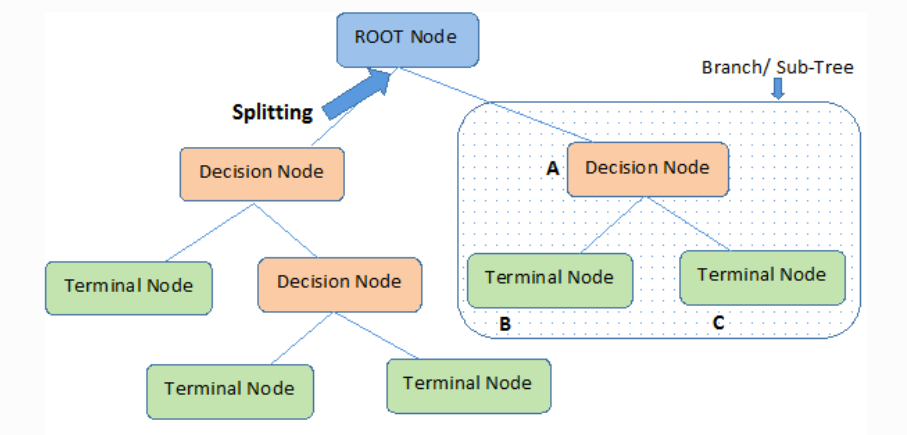 

**Q3.** SELF/TAKE-HOME: If you are not familiar with it, research and read about how a decision tree algorithm works. What is the difference between a regression and a  classification tree? Can you describe the steps of a decision tree (without using formulas) - image you were asked to do that in an interview. 

### Import the data we will use in the class

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target

In [3]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


**Q4.** Split the data in train-test, making sure to specify a seed and allocate 20% for resting.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

**Q5.** Import and train a regression tree. Evaluate the RMSE on the testing data.

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

0.7166503483307919


**Q6** Perform a grid search CV to optimize for the parametrs of the decision tree. You may want to tweak the ***max_depth***, ***min_samples_leaf*** and ***max_features*** parameters. 

Just a reminder, with k-fold cross-validation, we split te data into k samples (called folds) and we train the model on k-1 samples and validate the model on the held out one. We repeat the process, so that each sample has been a holdout set. The picture below describes it. 

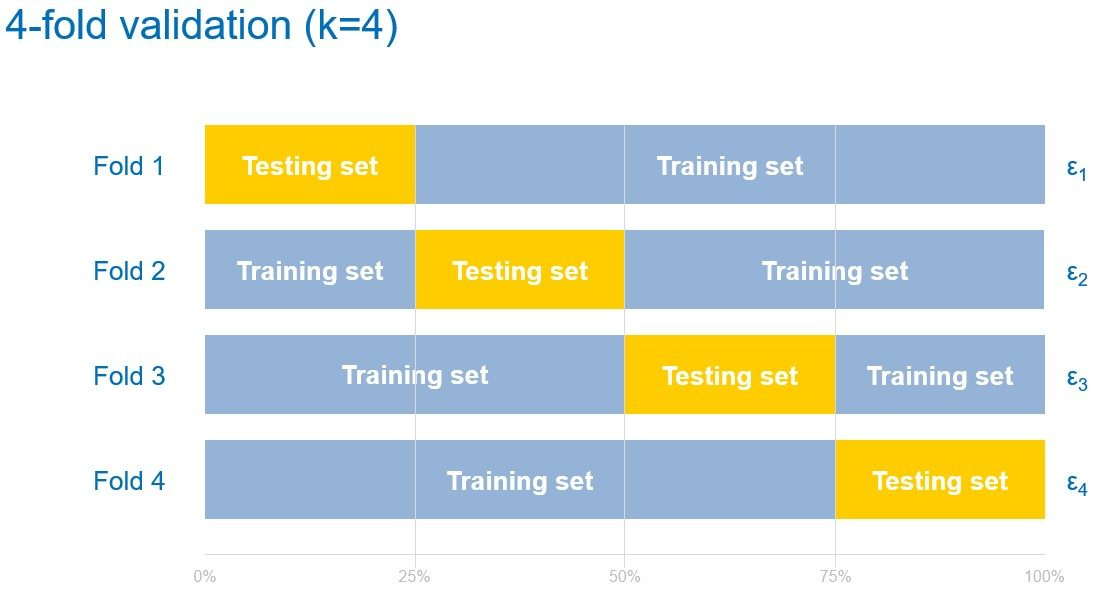

**Grid Search** is an exhaustive search over pre-specified parameter values. Often tweaking parameters of the model can result in a better performance. Grid search tries out models with each of the specified values of parameters. 

In [6]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [4, 6, 8, 10, 20], 
             'min_samples_leaf': [20, 50, 100, 200], 
             'max_features': ['auto', 'sqrt', 'log2']}

cv = GridSearchCV(dt, param_grid=parameters, cv=5, scoring='neg_root_mean_squared_error')
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [20, 50, 100, 200]},
             scoring='neg_root_mean_squared_error')

In [7]:
# summarize result
print('Best Score: %s' % cv.best_score_)
print('Best Hyperparameters: %s' % cv.best_params_)

Best Score: -0.6086679311753966
Best Hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 20}


**Q7.** What advantages and disadvanatges of decision trees can you think of? 

Here are my answers but do not limit yourself to them. Expand and add your own. 

**Advantages**: 
- Trees are very easy to explain to people (even more so than linear/logistic regressions)
- Some people believe decision trees more closely mirror human decision-making.
- They can be displayed graphically (if not extremely large) and can easily be interpreted by a non-expert.
- Trees can handle qualitative features without the need to create dummy variables, for example.

**Disadvanatges**:
- Unfortunately, they often do not have the same level of accuracy/precision as most other methods
- Trees can be very non-robust, i.e. a small change to the data can result in a completely different tree. 

**Q8**. Visualize the standard decision tree we built. If the tree is not extremely large, it can be quite valuable to visually expore and share with others. (*Hint:* You may want to use the **plot_tree** function from *sklearn.tree*. You may want to restrict the maximum depth of the tree, as well as specify the minimum samples per leaf to be at least 500 or more.)

[Text(724.0714285714287, 504.7714285714286, 'MedInc <= 5.124\nmse = 1.336\nsamples = 16512\nvalue = 2.077'),
 Text(438.42857142857144, 427.11428571428576, 'MedInc <= 3.129\nmse = 0.852\nsamples = 13221\nvalue = 1.756'),
 Text(212.57142857142858, 349.4571428571429, 'AveOccup <= 2.159\nmse = 0.581\nsamples = 6504\nvalue = 1.381'),
 Text(159.42857142857144, 271.8, 'mse = 1.127\nsamples = 971\nvalue = 1.934'),
 Text(265.7142857142857, 271.8, 'Latitude <= 34.455\nmse = 0.422\nsamples = 5533\nvalue = 1.284'),
 Text(159.42857142857144, 194.14285714285717, 'Longitude <= -117.79\nmse = 0.404\nsamples = 2686\nvalue = 1.501'),
 Text(106.28571428571429, 116.48571428571432, 'AveOccup <= 3.452\nmse = 0.395\nsamples = 1787\nvalue = 1.689'),
 Text(53.142857142857146, 38.82857142857142, 'mse = 0.466\nsamples = 829\nvalue = 1.95'),
 Text(159.42857142857144, 38.82857142857142, 'mse = 0.223\nsamples = 958\nvalue = 1.464'),
 Text(212.57142857142858, 116.48571428571432, 'mse = 0.214\nsamples = 899\nvalue = 

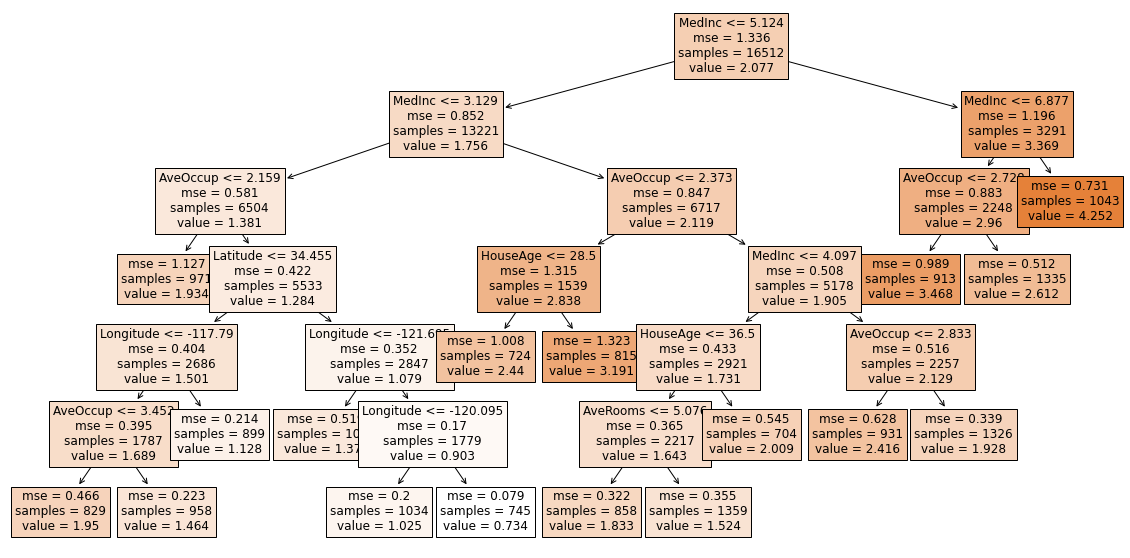

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))

dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=700)
dt.fit(X_train, y_train)
plot_tree(dt, feature_names=list(X_train.columns), precision=3, 
           filled=True, fontsize=12, impurity=True)

### Ensemble models

Ensemble models are stacked classifiers. You can think of them as meta models, which combine the predictions of multiple models. They can work with both regression and classification problems. The diagram below shows how that works. The idea is to combine a few models into one, better performing one.

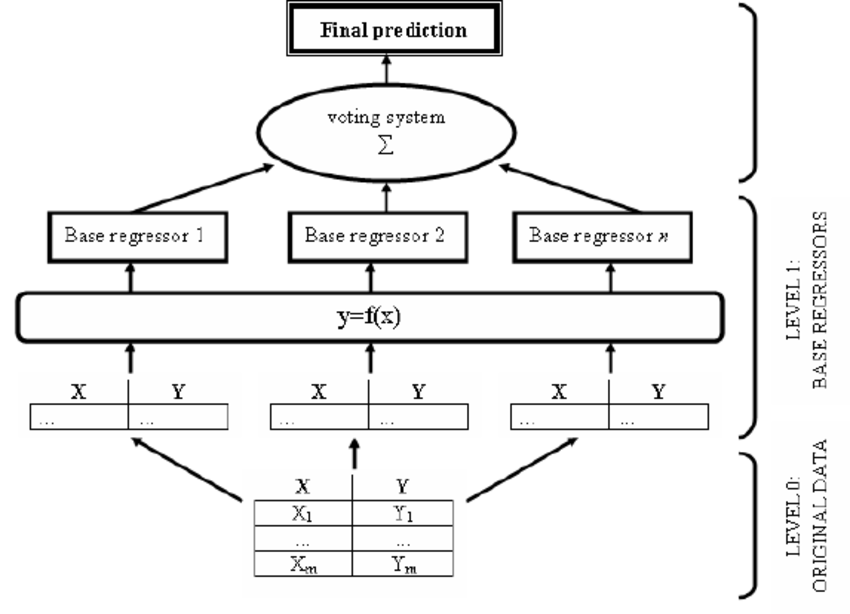

**Q9.** Import the VotingRegressor from from sklearn.ensemble. Specify as regressors a Linear regressor, a default decision tree regressor and a second decision tree with max_depth=20 and min_samples_leaf=700.

In [25]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
dt1 = DecisionTreeRegressor()
dt2 = DecisionTreeRegressor(max_depth=20, min_samples_leaf=700)

vr = VotingRegressor([('lr', lr), ('dt1', dt1), ('dt2', dt2)])
vr.fit(X_train, y_train)
y_pred = vr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

0.6067354342582058


### Random forests

Random forests are among the better performing models. It is an ensemble of decision trees (works with both regression and classification). The idea is we draw bootstrapped samples from the data (with replacement, meaning the same observation can be sampled multiple times and some observations are not sampled at all) and train decision tree models on each. In the end, we average across all the models or take a majority vote in the case of classification.
The *random* in random forest comes from the fact that at every split, not all features are considered but only a fraction of them, at random. 
Because of that, random forests are better performing also when there are correlated features in the data. 

**Q10.** Import and train a default random forest regressor. What is the RMSE of the testing set?

In [8]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_pred))
print(rmse_rf)

0.5038604507230445


**Q11.** One important step - for global interpretability - is to understand what features matter overall. The random forest has a **feature_importances_** method. Extract the feature importances and create a bar plot. 

    Bonus question: How are feature importances calculated? What do they tell us? 

<AxesSubplot:>

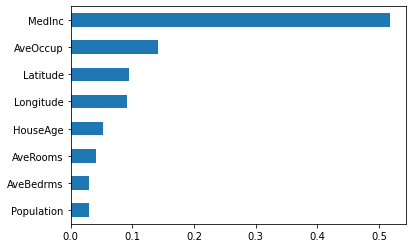

In [9]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh')

**Q12.** Perform a grid search cross-validation on a random forest. Explore the sklearn documentation and what parameters you can tweak. What hyperparameters result in the best performing model? 

NOTE: This could take a while. 

In [10]:
params = {'n_estimators' : [200, 500], 
         'max_depth': [8, 10, 20],
         'max_features': [2, 6], 
         'min_samples_leaf': [400, 600, 900]}

cv_rf = GridSearchCV(rf, param_grid=params, cv=5, scoring='neg_root_mean_squared_error')
cv_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [8, 10, 20], 'max_features': [2, 6],
                         'min_samples_leaf': [400, 600, 900],
                         'n_estimators': [200, 500]},
             scoring='neg_root_mean_squared_error')

In [11]:
# summarize result
print('Best Score: %s' % cv_rf.best_score_)
print('Best Hyperparameters: %s' % cv_rf.best_params_)

Best Score: -0.7110402651157848
Best Hyperparameters: {'max_depth': 8, 'max_features': 6, 'min_samples_leaf': 400, 'n_estimators': 500}


### Boosting models

Boosting is also an ensemble model (i.e. we have multitude of models) but unlike bagging or random forest, trees are grown sequentially. The trees are also usually super small (also called 'stumps') and each new tree puts more weight on observations that prior trees got wrong. 

With Gradient Boosting, the target in each sequential step is the residuals (errors) of the prior step. Boosting is a slow learning process, therefore we add a shrunken version of each tree to the total ensemble (by specifying a weight/parameter). 

**Q13.** Import a Gradient boosting regressor from sklearn (use default parameters). What is the performance on the testing set?

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

gb_pred = gb.predict(X_test)
rmse_gb = np.sqrt(mean_squared_error(y_test, gb_pred))
print(rmse_gb)

0.5383727984639515


**Q14.** Plot the feature importances after the gradient boosting. Is there any difference with the feature importance plot after the random forest model?

<AxesSubplot:>

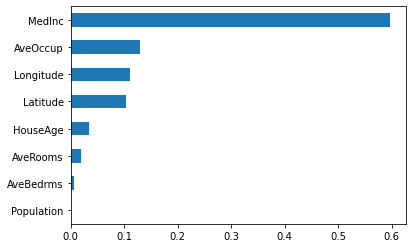

In [17]:
feat_importances_gb = pd.Series(gb.feature_importances_, index=X.columns)
feat_importances_gb.sort_values().plot(kind='barh')

You may have heard /you may hear soon enough about different Gradient Boosting models and libraries: XGBoost, LightGBM, CatBoost. They are external libraries which are numerically more efficient than the sklearn implementation. For a good tutorial on them, check out this link: https://machinelearningmastery.com/gradient-boosting-with-scikit-learn-xgboost-lightgbm-and-catboost/ 